In [88]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use("dark_background")

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples,
                   noise=0.03,
                   random_state = 42)

In [3]:
cicles = pd.DataFrame({"x0":x[:,0],"x1":x[:,1], "label":y})
cicles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


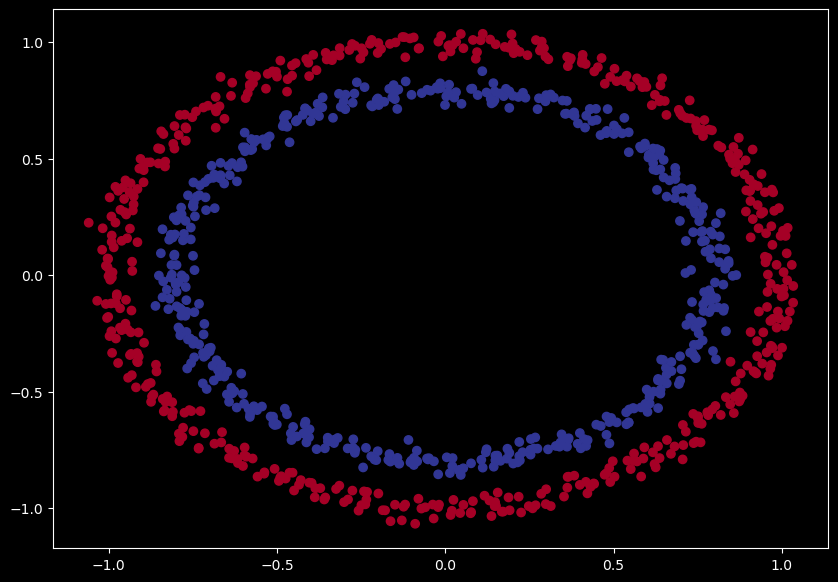

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [6]:
classify_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

classify_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["mae", "accuracy"])

hist_6 = classify_6.fit(x_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6882 - mae: 0.4957 - accuracy: 0.5213
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6815 - mae: 0.4906 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6730 - mae: 0.4881 - accuracy: 0.5312
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6623 - mae: 0.4803 - accuracy: 0.5213
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6463 - mae: 0.4723 - accuracy: 0.5713
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6123 - mae: 0.4561 - accuracy: 0.8000
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5624 - mae: 0.4259 - accuracy: 0.8537
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4914 - mae: 0.3840 - accuracy: 0.9613
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4171 - mae: 0.3338 - 

<Axes: >

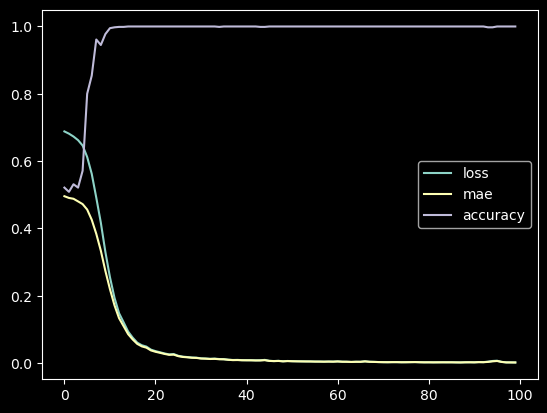

In [7]:
pd.DataFrame(hist_6.history).plot()

In [8]:
# Finding the best learning rate

In [9]:
classify_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

classify_7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = "accuracy")

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

hist7 = classify_7.fit(x_train,
                       y_train,
                       epochs=100,
                      # callbacks=[lr_scheduler]
                      )

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.4938
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6759 - accuracy: 0.5125
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.5250
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6449 - accuracy: 0.5450
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7337
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.9000
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.9800
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.9862
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2931 - accuracy: 0.9900
Epoch 11/

In [89]:
classify_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(2,), activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

classify_8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                  loss = tf.keras.losses.BinaryCrossentropy(),
                  metrics = "accuracy")

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

hist8 = classify_8.fit(x_train,
                       y_train,
                       epochs=100,
                      callbacks=[lr_scheduler, tensorboard_callback])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4875 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: >

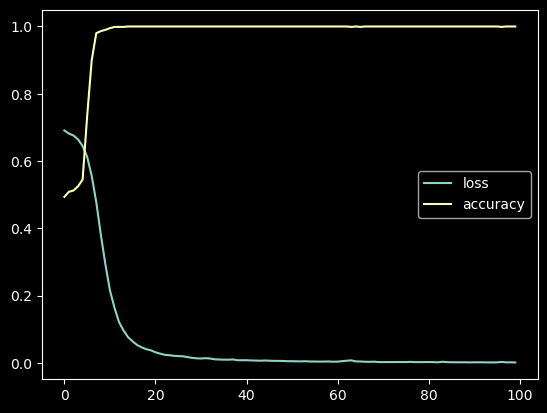

In [11]:
pd.DataFrame(hist7.history).plot()

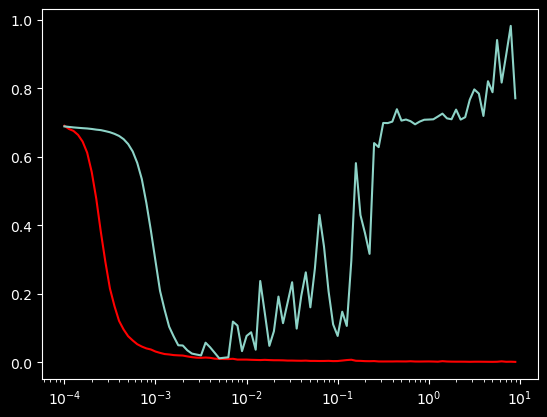

In [12]:
learnr = 1e-4 * (10**(tf.range(100)/20))
learnr
plt.semilogx(learnr, hist7.history["loss"], c="red")
plt.semilogx(learnr, hist8.history["loss"])
plt.show()

In [13]:
classify_7.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000


[0.0013802802423015237, 1.0]

In [14]:
classify_8.evaluate(x_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5350


[0.6907809376716614, 0.5350000262260437]

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = classify_7.predict(x_test)

cm = confusion_matrix(y_true = y_test,
                      y_pred=y_pred.round())

7/7 [==============================] - 0s 1ms/step


<Axes: >

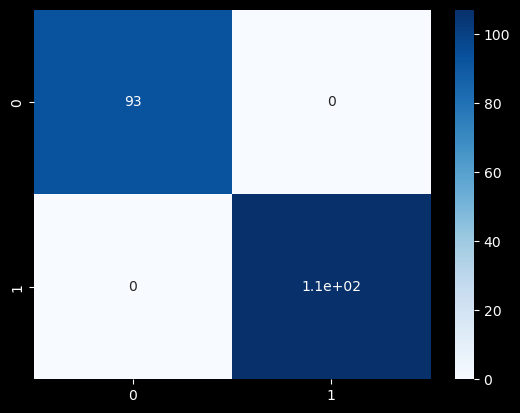

In [114]:
sns.color_palette("light:b", as_cmap=True)
sns.heatmap(cm, annot=True, cmap="Blues")

# Evaluation Methods

* Accuracy
* Precision
* Recall
* F1- score
* Confusion Matrix
* Classification Report (Scikit learn)

In [62]:
loss, accuracy = classify_7.evaluate(x_test, y_test)
print(f"model loss: {round(loss,3)}")
print(f"model accuracy: {accuracy*100}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.0014 - accuracy: 1.0000
model loss: 0.001
model accuracy: 100.0%


In [82]:
print(classification_report(y_true = y_test,
                     y_pred = y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00       107

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

